In [10]:
import io
import os
import re
import sys
import csv
import gzip
import glob
import time
import secrets
import multiprocessing
import subprocess
import resource
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from plotnine import *
import patchworklib as pw
import scipy as sp
import statsmodels.api as sm
import random
from collections import Counter
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
import itertools
import collections
sys.path.append('/well/band/users/rbx225/software/lcwgsus/')
import lcwgsus
from lcwgsus.variables import *

from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import friedmanchisquare
from scipy.stats import studentized_range
pd.options.mode.chained_assignment = None
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

%cd /gpfs3/well/band/users/rbx225/GAMCC/

# from matplotlib import colormaps
# list(colormaps)

/gpfs3/well/band/users/rbx225/GAMCC


# HBA, GYP, BSG, ACKR

In [24]:
variants = pd.DataFrame(columns = ['chr', 'pos', 'ID', 'ref', 'alt', 'MAF'])

HbS = [11, 5227002, 'rs334', 'T', 'A', 0.0494]
HbC = [11, 5227003, 'rs33930165', 'C', 'T', 0.01452]
O = [9, 133257521, 'rs8176719', 'T', 'TC', 0.3030]
ATP2B4 = [8, 697972, 'rs1075451', 'C', 'T', 0.5743]

genes = [HbS, HbC, O, ATP2B4]
for g in genes:
    variants.loc[len(variants)] = g

In [27]:
variants.loc[0, 'r2_lc']

0

In [28]:
chip = '../archive/GAMCC_old/imputation_comparison/vanilla/chip_topmed--hc--snps_gw/impacc/all_samples/by_variant/'
lc = '../archive/GAMCC_old/imputation_comparison/vanilla/lc_oneKG_topmed--hc--snps_gw/impacc/all_samples/by_variant/'

variants['r2_lc'] = 0
variants['r2_chip'] = 0

for i, v in enumerate(genes):
    c, pos, ref, alt = v[0], v[1], v[3], v[4]
    tmp1 = pd.read_csv(chip + 'chr' + str(c) + '.h.tsv', sep = '\t')
    tmp1 = tmp1[(tmp1['pos'] == pos) & (tmp1['ref'] == ref) & (tmp1['alt'] == alt)]
    if len(tmp1) == 0:
        r2 = 0
    else:
        r2 = tmp1['r2'].values
    variants.loc[i, 'r2_lc'] = r2
    
    tmp2 = pd.read_csv(chip + 'chr' + str(c) + '.h.tsv', sep = '\t')
    tmp2 = tmp2[(tmp2['pos'] == pos) & (tmp2['ref'] == ref) & (tmp2['alt'] == alt)]
    if len(tmp2) == 0:
        r2 = 0
    else:
        r2 = tmp2['r2'].values
    variants.loc[i, 'r2_chip'] = r2

In [29]:
variants

,chr,pos,ID,ref,alt,MAF,r2_lc,r2_chip
0,11,5227002,rs334,T,A,0.04940,-9.000000,-9.000000
1,11,5227003,rs33930165,C,T,0.01452,-9.000000,-9.000000
2,9,133257521,rs8176719,T,TC,0.30300,0.000000,0.000000
3,8,697972,rs1075451,C,T,0.57430,0.953185,0.953185


In [ ]:
pd.read_csv(chip + 'chr' + str(11) + '.h.tsv', sep = '\t')

In [2]:
regions = pd.DataFrame(columns = ['chr', 'start', 'end', 'gene'])

# HBA1 = [16, 176680, 177522, 'HBA1']
# HBA2 = [16, 172876, 173710, 'HBA2']
GYPA = [4, 144109303, 144140751, 'GYPA']
GYPB = [4, 143996104, 144019380, 'GYPB'] 
GYPE = [4, 143870864, 143905563, 'GYPE']

BSG = [19, 571277, 583494, 'BSG']
ACKR1 = [1, 159203307, 159206500, 'ACKR1']

genes = [GYPA, GYPB, GYPE, BSG, ACKR1]
# genes = [HBA1, HBA2, GYPA, GYPB, GYPE, BSG, ACKR1]

for g in genes:
    regions.loc[len(regions)] = g

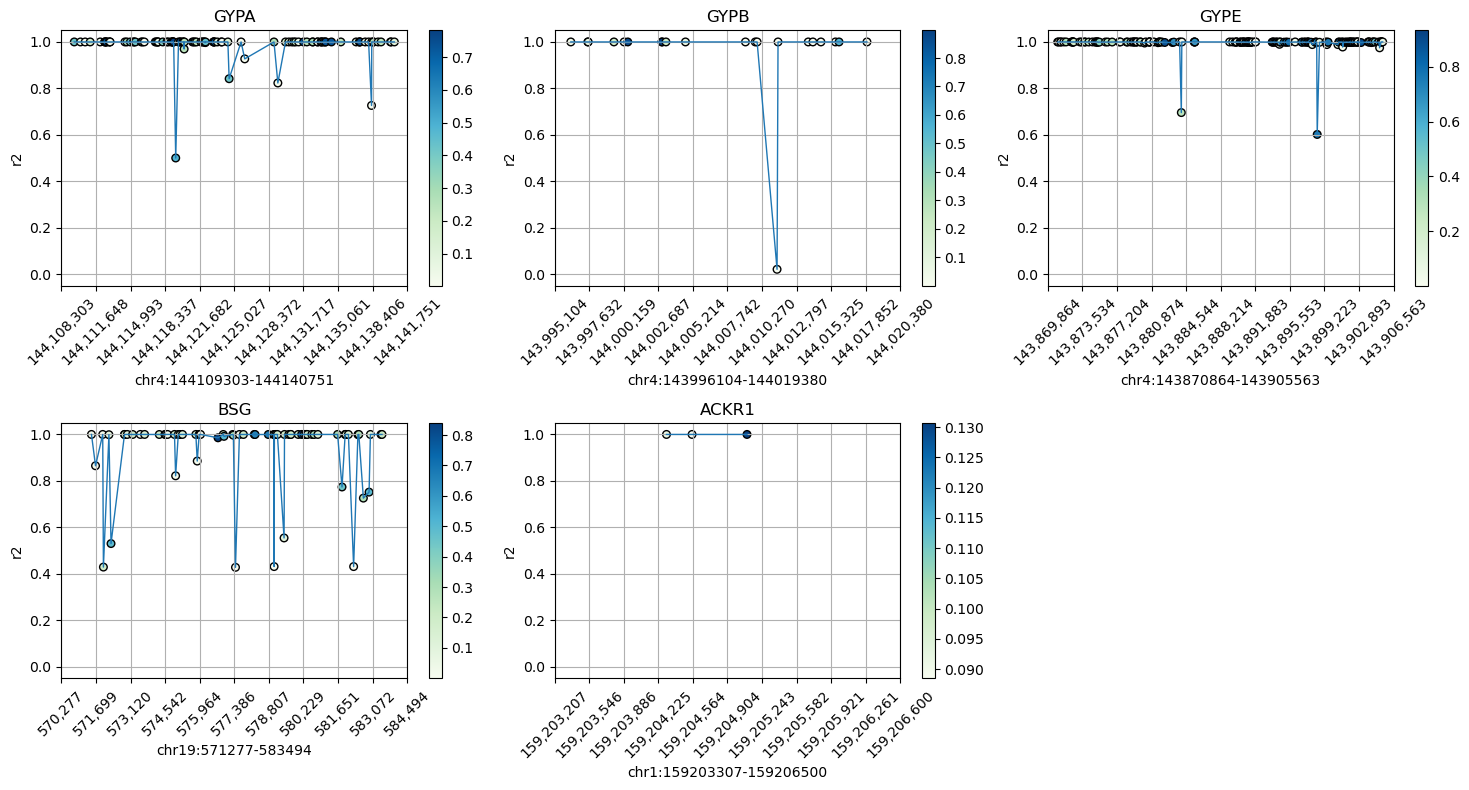

In [4]:
imp_dir = '../archive/GAMCC_old/imputation_comparison/vanilla/lc_oneKG_topmed--hc--snps_gw/impacc/all_samples/by_variant/'
hs = []
for i in CHROMOSOMES_ALL:
    t = pd.read_csv(imp_dir + 'chr' + str(i) + '.h.tsv', sep = '\t')
    hs.append(t)
h = pd.concat(hs)
h = h[(h[['NRC', 'r2', 'ccd_het', 'ccd_homalt']] != -9.).any(axis = 1)]

nrow = 2
ncol = 3
ngraph = len(regions)
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 8))

for i in range(nrow*ncol):
    row = i // (nrow + 1)
    col = i % ncol
    if i < ngraph:
        c, s, e, t = tuple(regions.loc[i].values)
        lcwgsus.plot_imputation_metric_in_region(h, chr=c, pos=0, start=s, end=e, title=t, show_fig=True, ax=axes[row, col])
    else:
        fig.delaxes(axes[row, col])
        
plt.tight_layout()
plt.show()

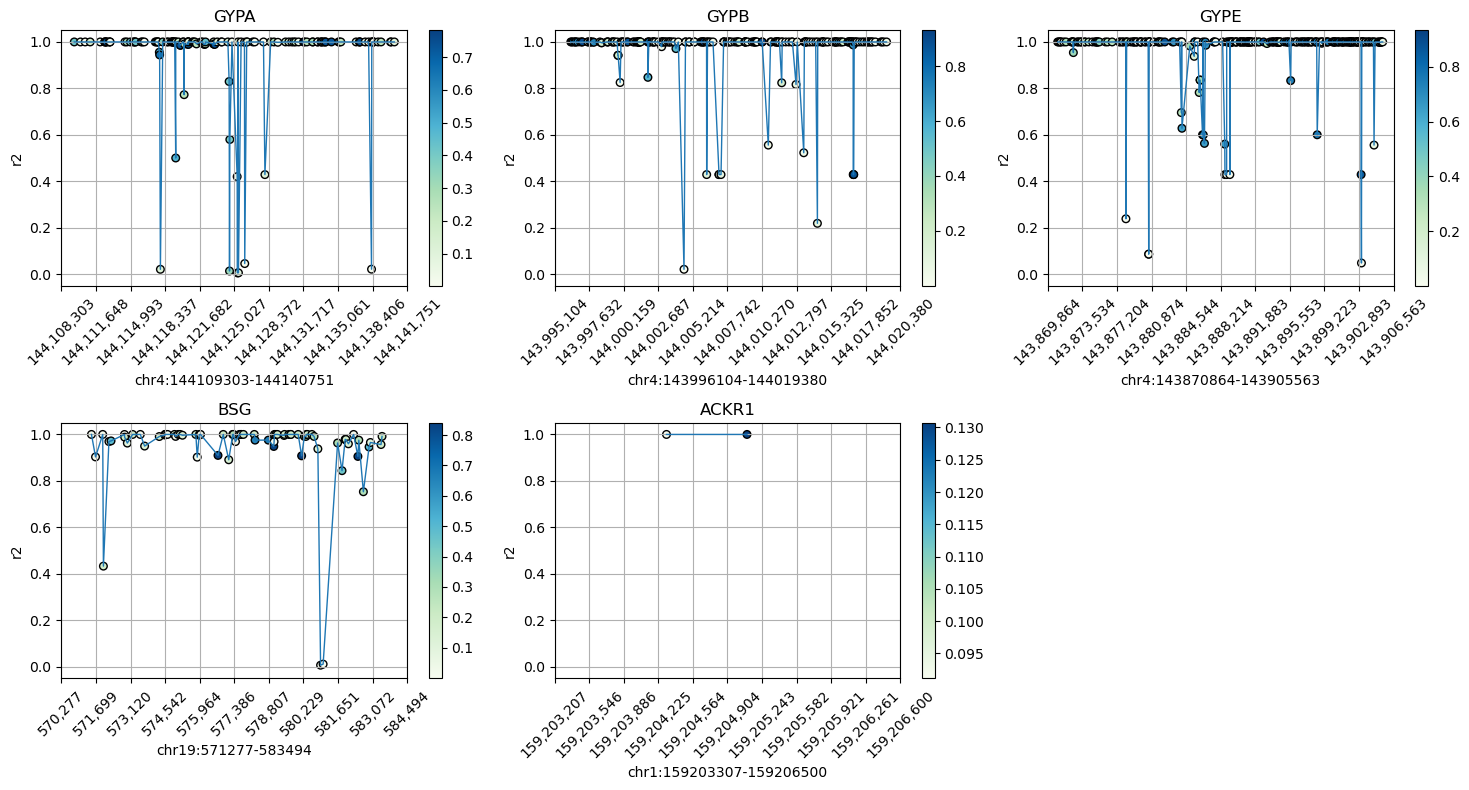

In [5]:
imp_dir = '../archive/GAMCC_old/imputation_comparison/vanilla/lc_oneKG--hc--snps_gw/impacc/all_samples/by_variant/'
hs = []
for i in CHROMOSOMES_ALL:
    t = pd.read_csv(imp_dir + 'chr' + str(i) + '.h.tsv', sep = '\t')
    hs.append(t)
h = pd.concat(hs)
h = h[(h[['NRC', 'r2', 'ccd_het', 'ccd_homalt']] != -9.).any(axis = 1)]

nrow = 2
ncol = 3
ngraph = len(regions)
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 8))

for i in range(nrow*ncol):
    row = i // (nrow + 1)
    col = i % ncol
    if i < ngraph:
        c, s, e, t = tuple(regions.loc[i].values)
        lcwgsus.plot_imputation_metric_in_region(h, chr=c, pos=0, start=s, end=e, title=t, show_fig=True, ax=axes[row, col])
    else:
        fig.delaxes(axes[row, col])
        
plt.tight_layout()
plt.show()

# GAMCC sample information

In [111]:
ethnic = pd.read_csv('data/metadata/ethnic_group.csv')
ethnic = ethnic.rename(columns = {'Chip_Name': 'FID'})

lc = lcwgsus.read_tsv_as_lst('data/sample_tsvs/fv_gam_names.tsv')
ethnic = ethnic[ethnic['FID'].isin(lc)]
ethnic.groupby('ethnic').count()

,FID
ethnic,
Fula,53
Jola,54
Mandinka,51
Wollof,52


# HLA

In [12]:
def plot_hla_imputation_accuracy(hla_dirs, labels, indices = None, cmap = CATEGORY_CMAP_STR, save_fig=False, outdir=None, save_name=None):
    hla_reports = []
    
    colors = plt.get_cmap(cmap).colors[:(len(labels))]
    hex_codes = [mcolors.to_hex(color) for color in colors]
    colors = dict(zip(labels, hex_codes))
    
    if indices is not None:
        hla_dirs = [hla_dirs[i] for i in indices]
        labels = [labels[i] for i in indices]
        
    for d, l in zip(hla_dirs, labels):
        report = lcwgsus.calculate_hla_imputation_accuracy(d, hla, l)
        hla_reports.append(report)
    report = pd.concat(hla_reports)
    report['Locus'] = pd.Categorical(report['Locus'], categories=HLA_GENES[::-1], ordered=True)
    report['Source'] = pd.Categorical(report['Source'], categories=labels, ordered=True)
    report = report.sort_values(by = 'Locus')
        
    onefield = report[report['Resolution'] == 'One field']
    plot1 = (
        ggplot(onefield, aes(x='Concordance', y='Locus', color='Source')) +
        geom_point(size=2) + ggtitle('One Field') + theme_minimal() +
        scale_color_manual(values=colors) +
        theme(axis_text_y=element_text(angle=0), title=element_text(hjust='1'))
    )
    twofield = report[report['Resolution'] == 'Two field']
    plot2 = (
        ggplot(twofield, aes(x='Concordance', y='Locus', color='Source')) +
        geom_point(size=2) + ggtitle('Two Field') +
        scale_color_manual(values=colors) +
#         labs(x='Concordance', y='Locus', color='Source') + 
        theme_minimal() + 
        theme(axis_text_y=element_text(angle=0), title=element_text(hjust=2))
    )
    p1 = pw.load_ggplot(plot1, figsize=(4,4))
    p2 = pw.load_ggplot(plot2, figsize=(4,4))
    p12 = (p1|p2)
    return p12

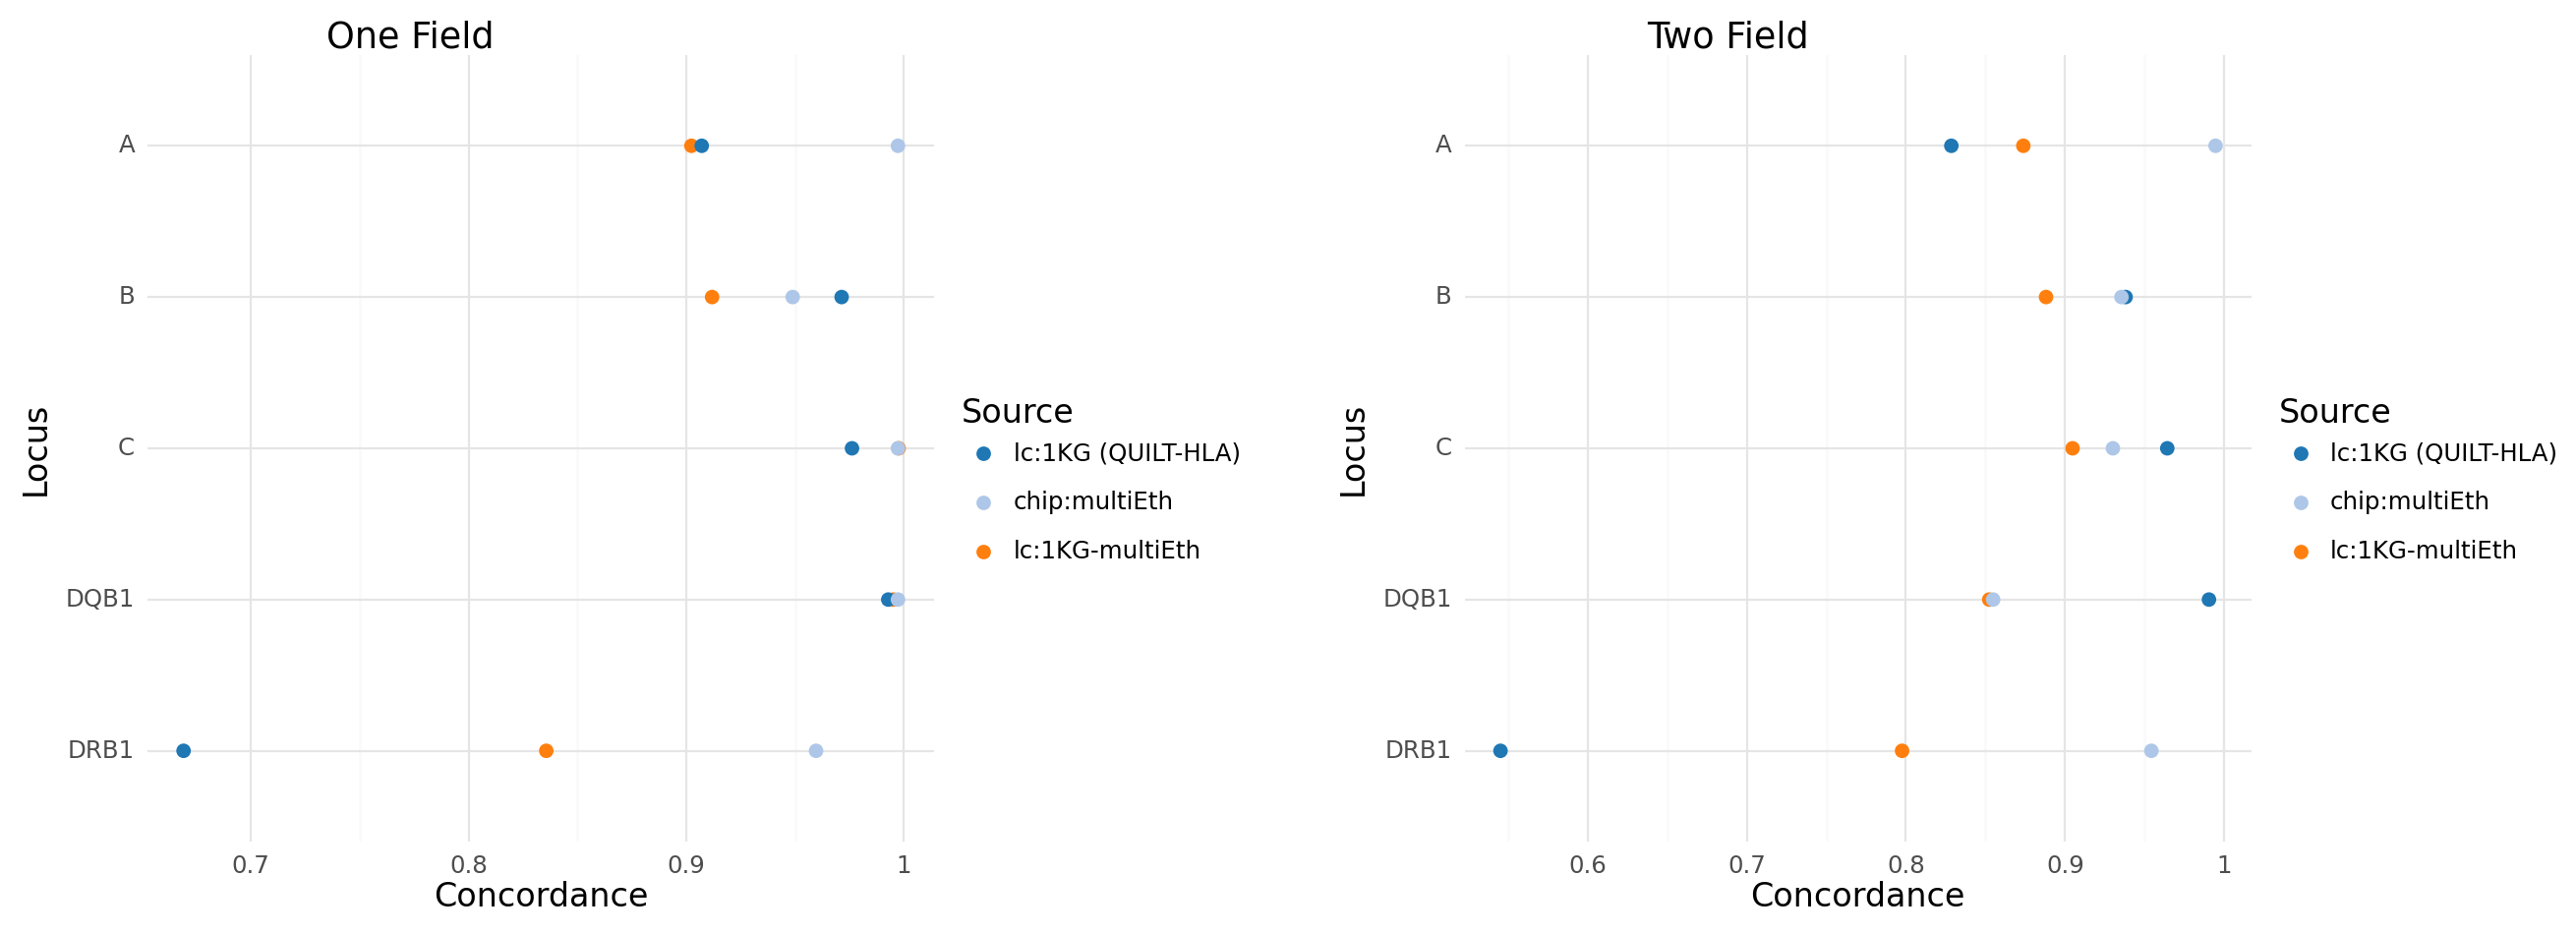

In [13]:
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')

hla_dirs = ['/well/band/users/rbx225/GAMCC/results/hla/imputation/batches_archived/', 
                  '/well/band/users/rbx225/GAMCC/results/hla/server/chip_vanilla/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_oneKG/chr6.dose.vcf.gz']
labels =  ['lc:1KG (QUILT-HLA)', 'chip:multiEth', 'lc:1KG-multiEth']

hla_reports = []

for d, l in zip(hla_dirs, labels):
    report = lcwgsus.calculate_hla_imputation_accuracy(d, hla, l)
    hla_reports.append(report)

p = plot_hla_imputation_accuracy(hla_dirs, labels)
p

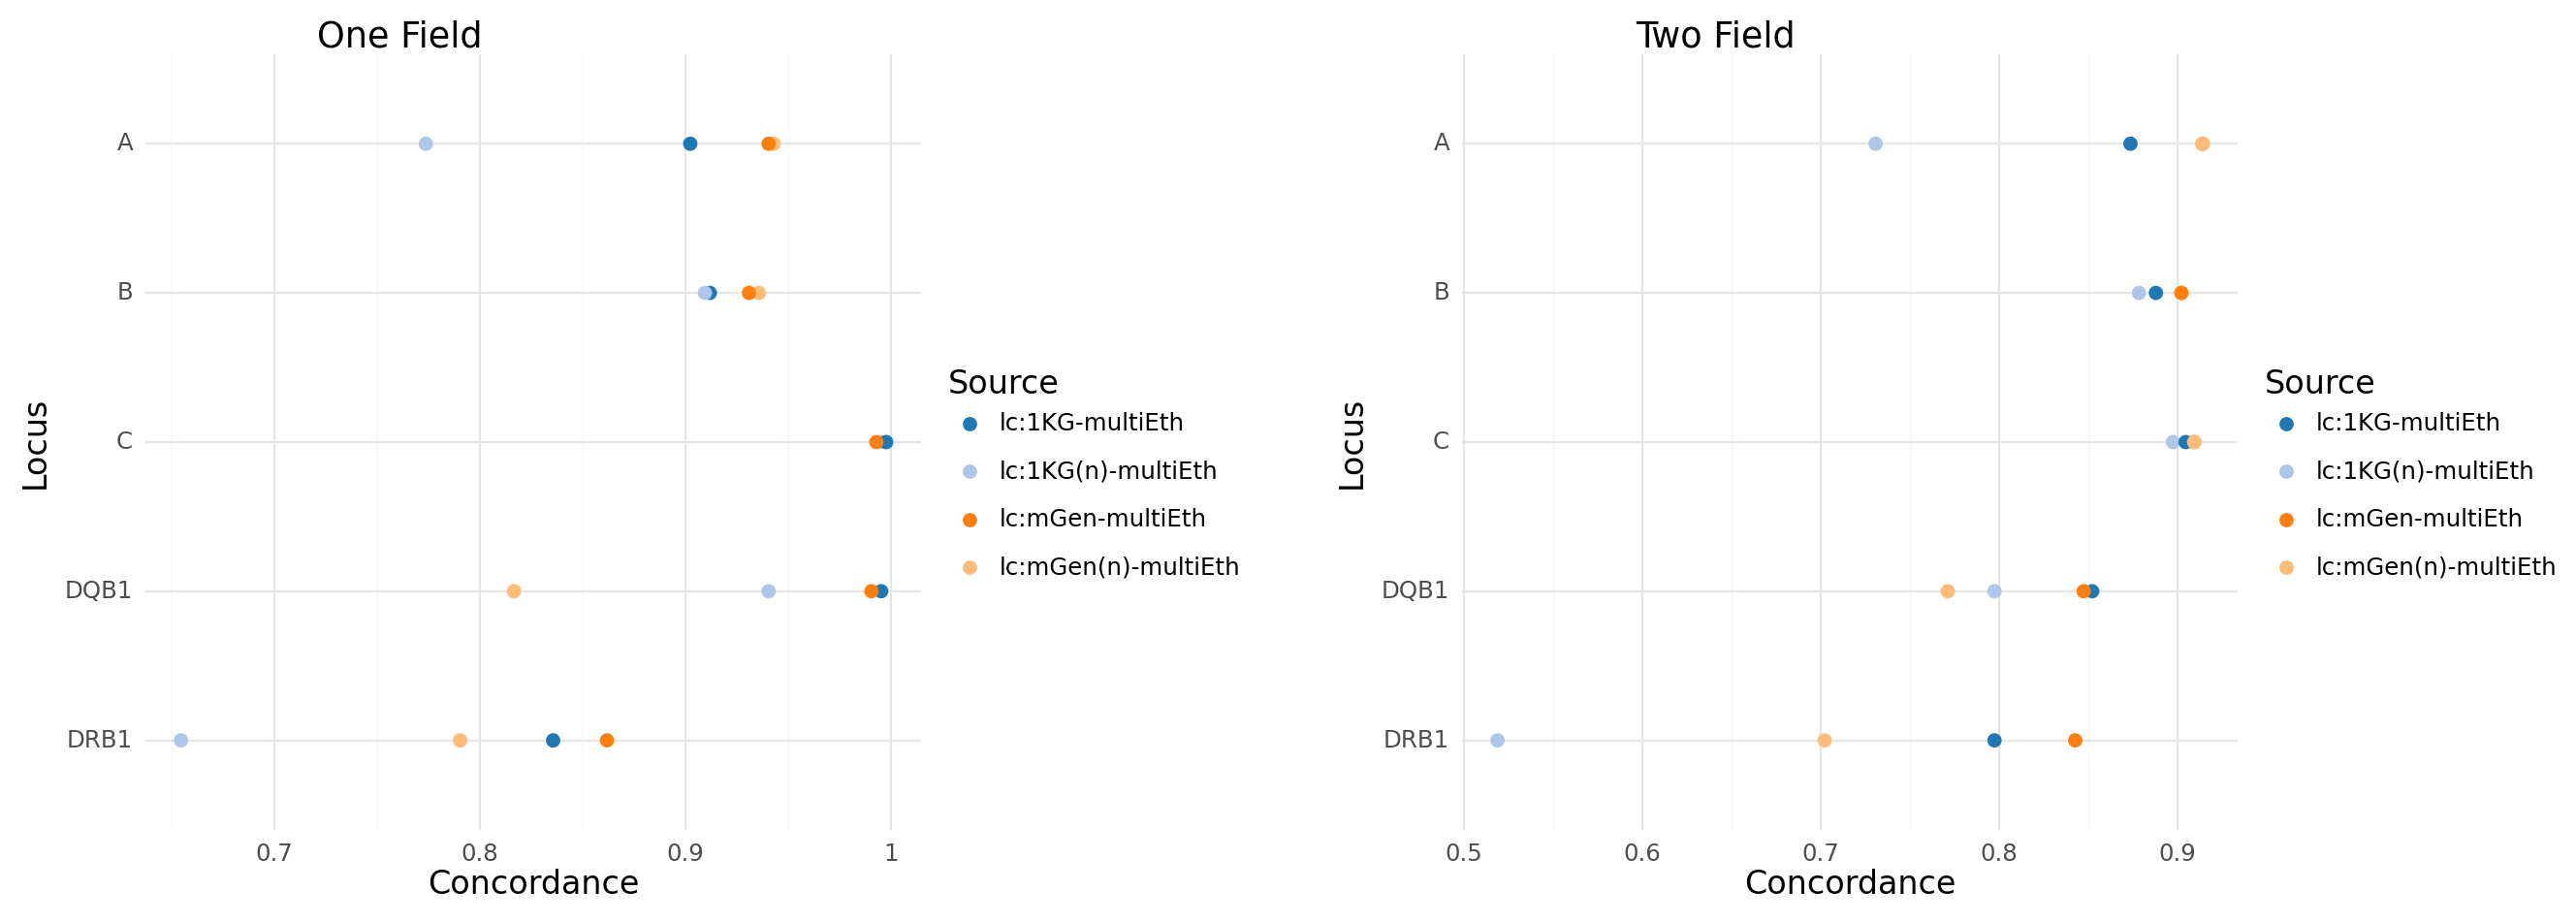

In [14]:
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')

hla_dirs = ['/well/band/users/rbx225/GAMCC/results/hla/server/lc_oneKG/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_oneKG_new/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1_new/chr6.dose.vcf.gz']
labels =  ['lc:1KG-multiEth', 'lc:1KG(n)-multiEth', 'lc:mGen-multiEth', 'lc:mGen(n)-multiEth']

hla_reports = []

for d, l in zip(hla_dirs, labels):
    report = lcwgsus.calculate_hla_imputation_accuracy(d, hla, l)
    hla_reports.append(report)

p = plot_hla_imputation_accuracy(hla_dirs, labels)
p

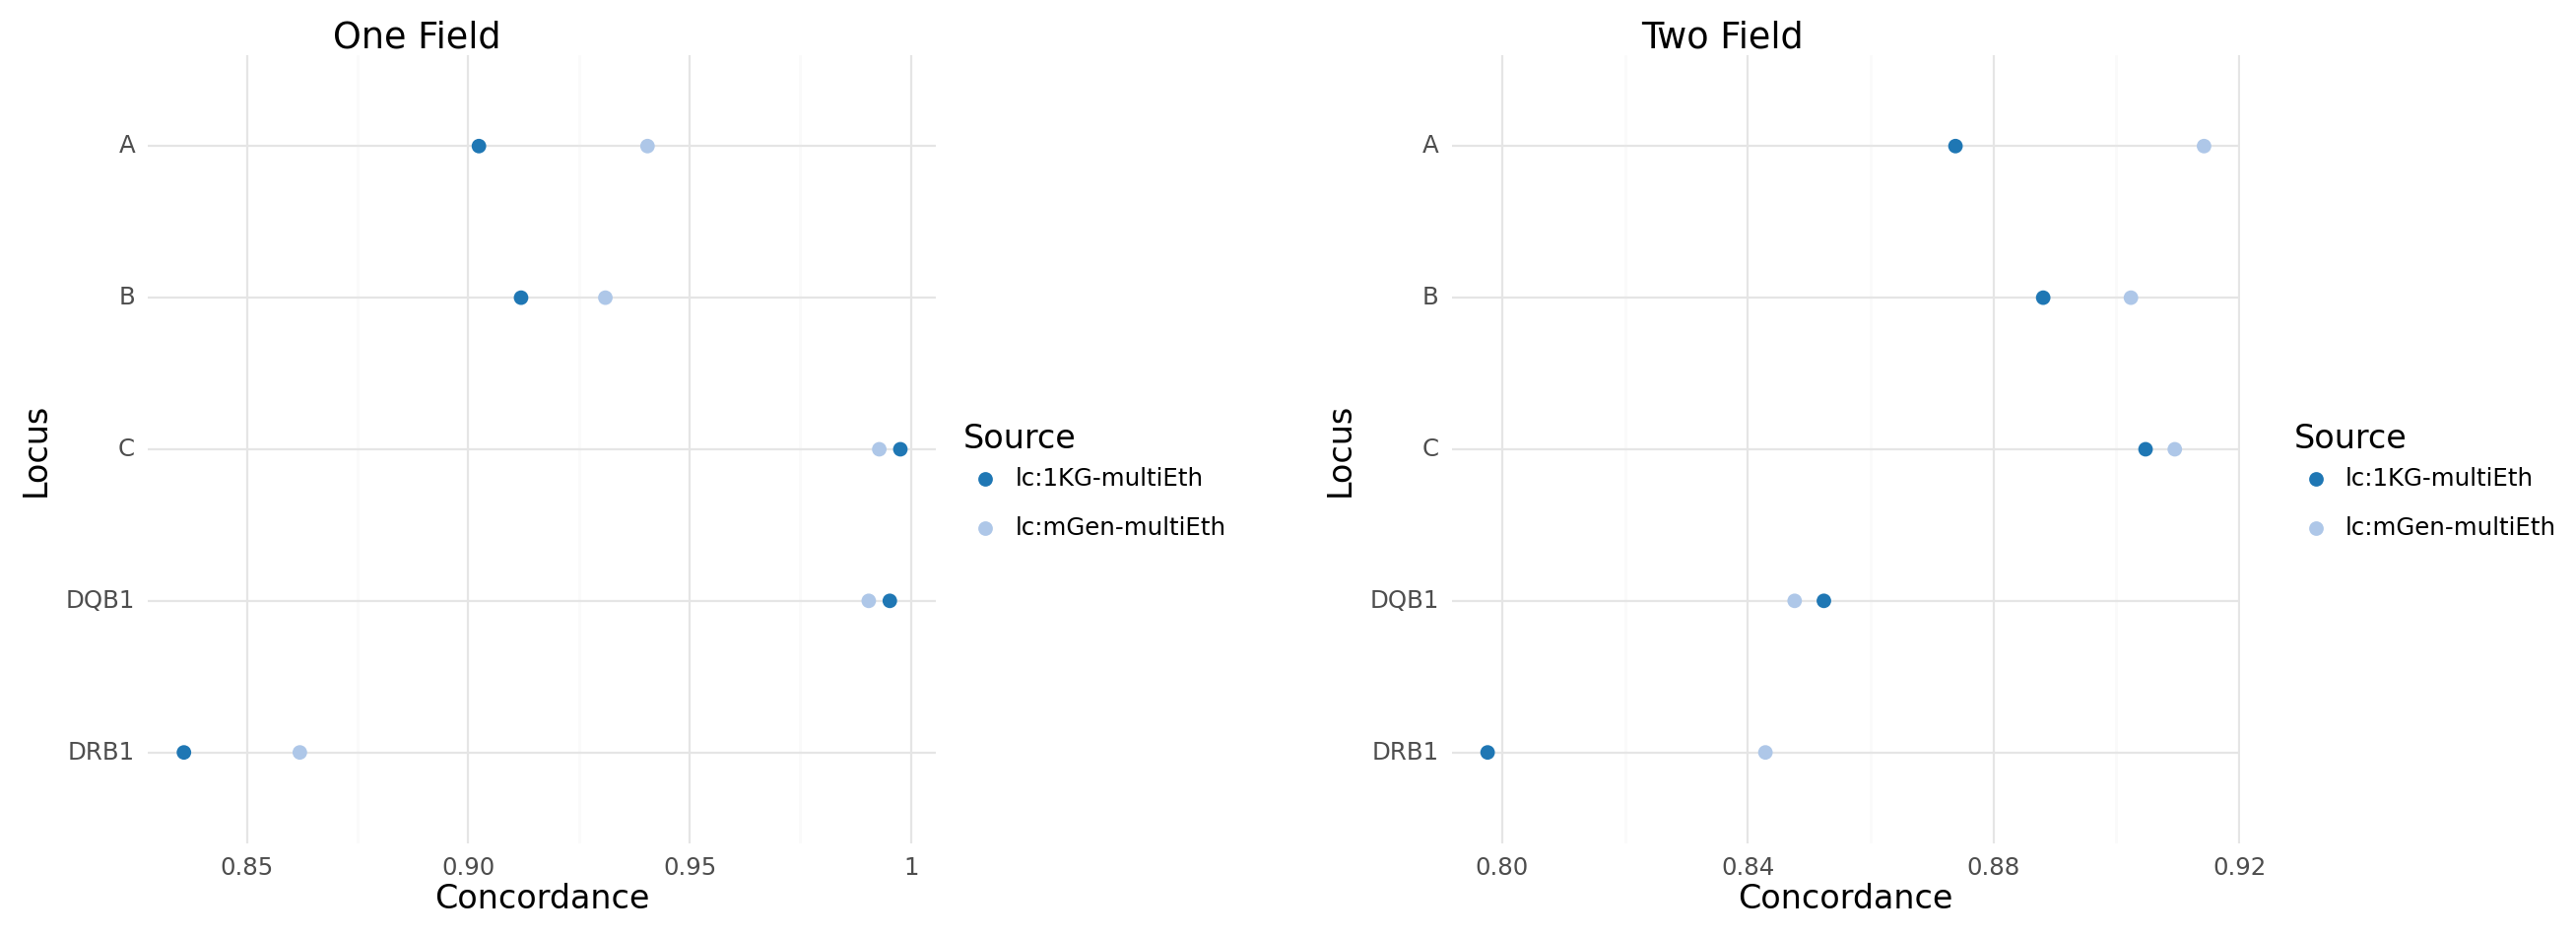

In [15]:
ix = [0, 2]

hla_dir = [hla_dirs[i] for i in ix]
label = [labels[i] for i in ix]

p = plot_hla_imputation_accuracy(hla_dir, label)
p

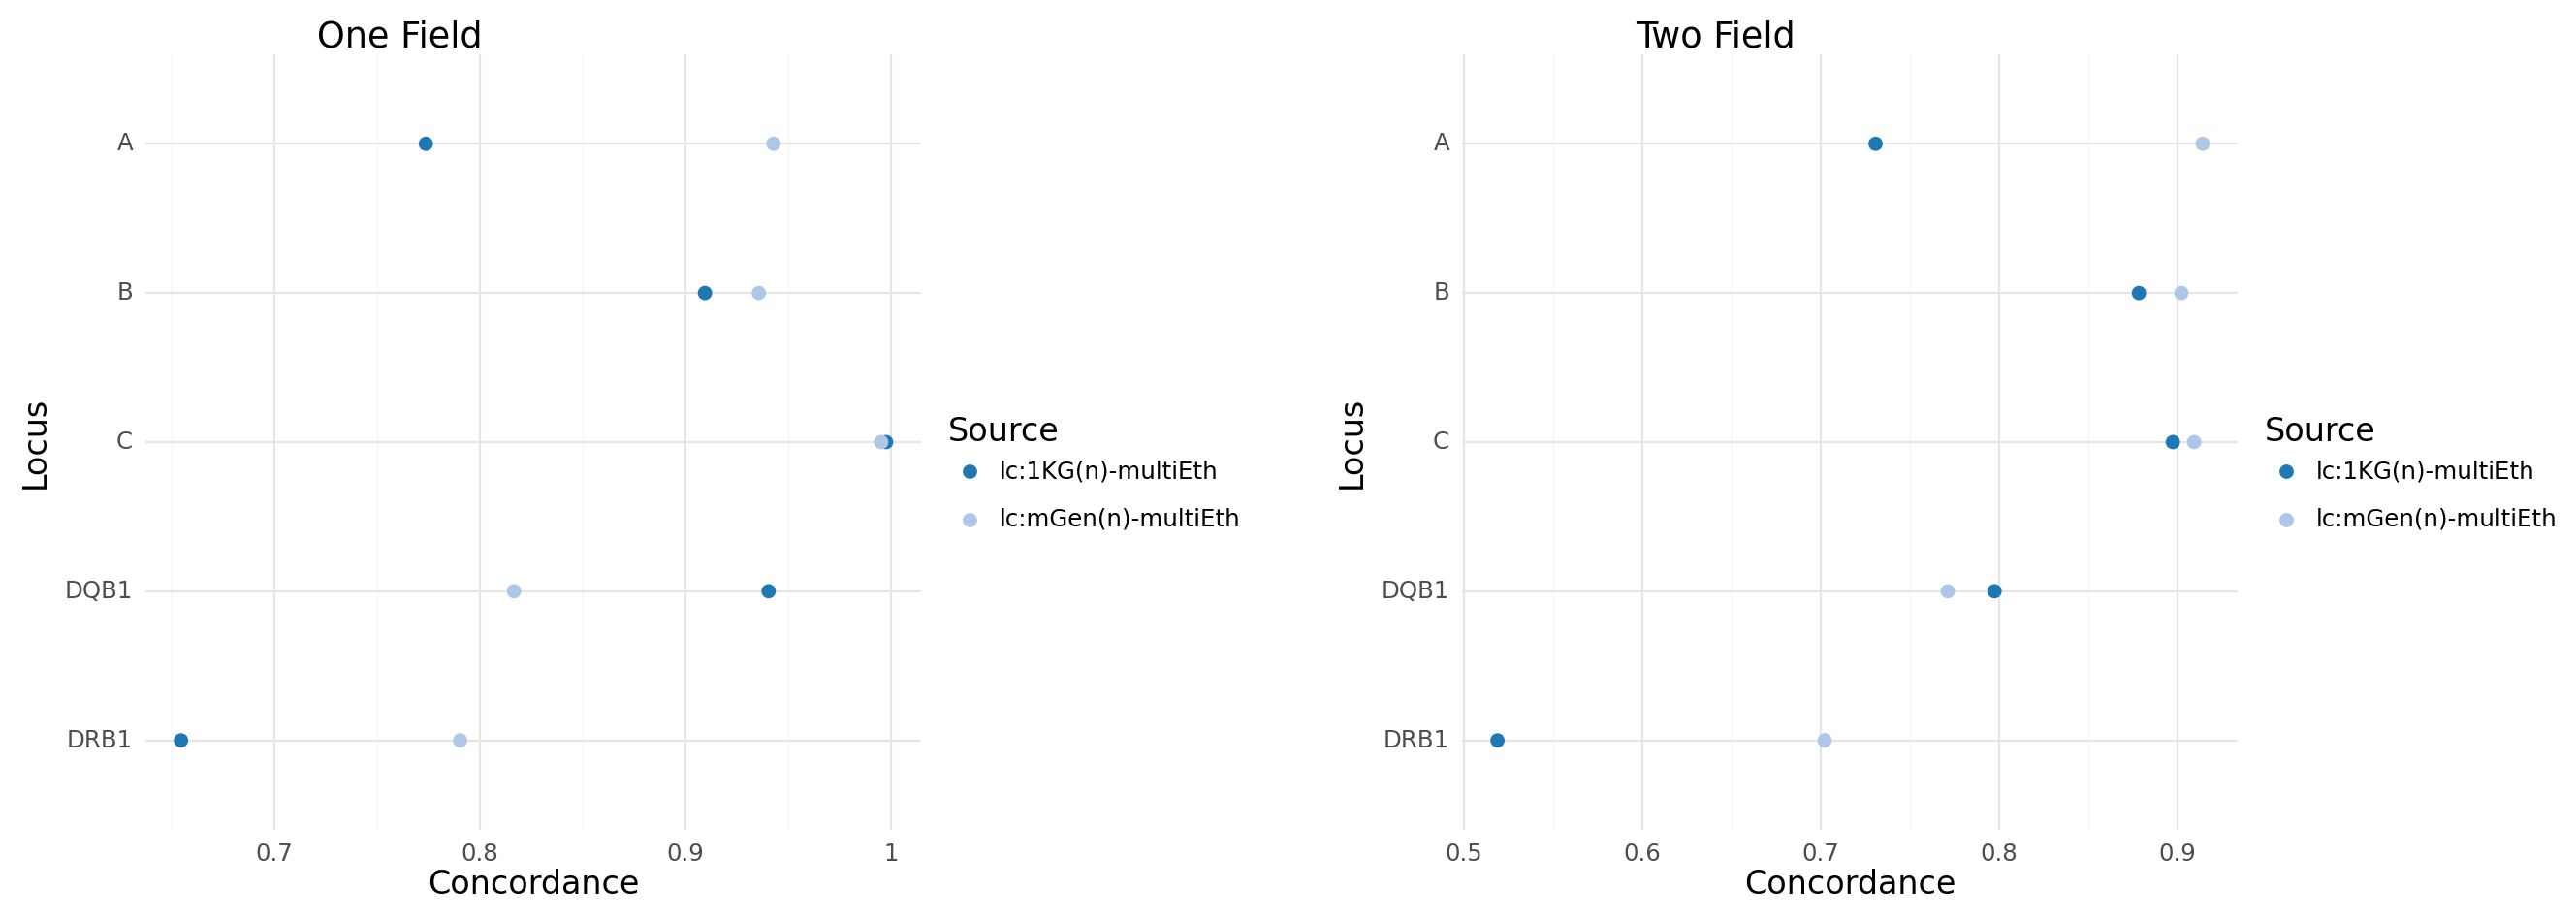

In [17]:
ix = [1, 3]

hla_dir = [hla_dirs[i] for i in ix]
label = [labels[i] for i in ix]

p = plot_hla_imputation_accuracy(hla_dir, label)
p

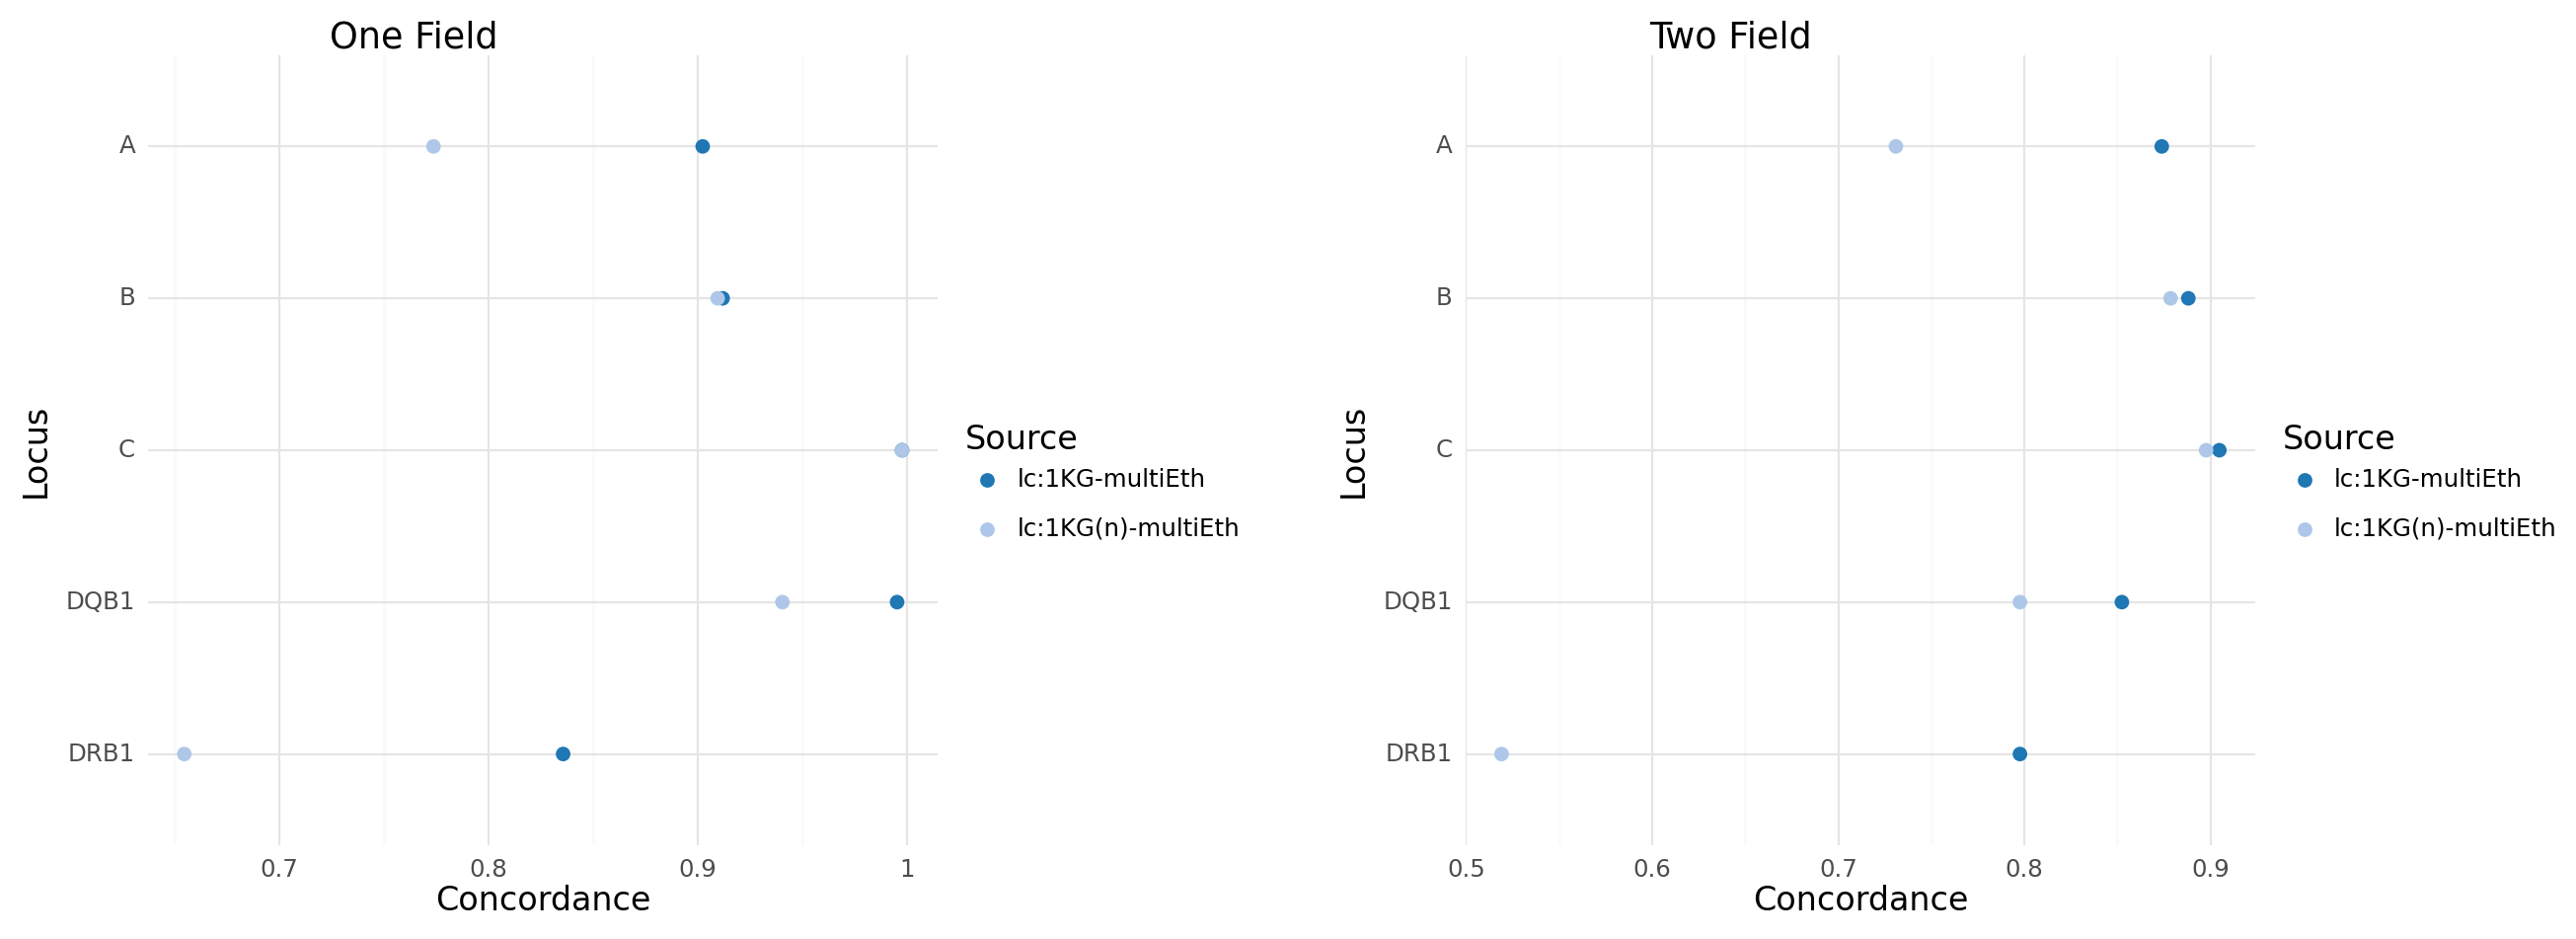

In [18]:
ix = [0, 1]

hla_dir = [hla_dirs[i] for i in ix]
label = [labels[i] for i in ix]

p = plot_hla_imputation_accuracy(hla_dir, label)
p

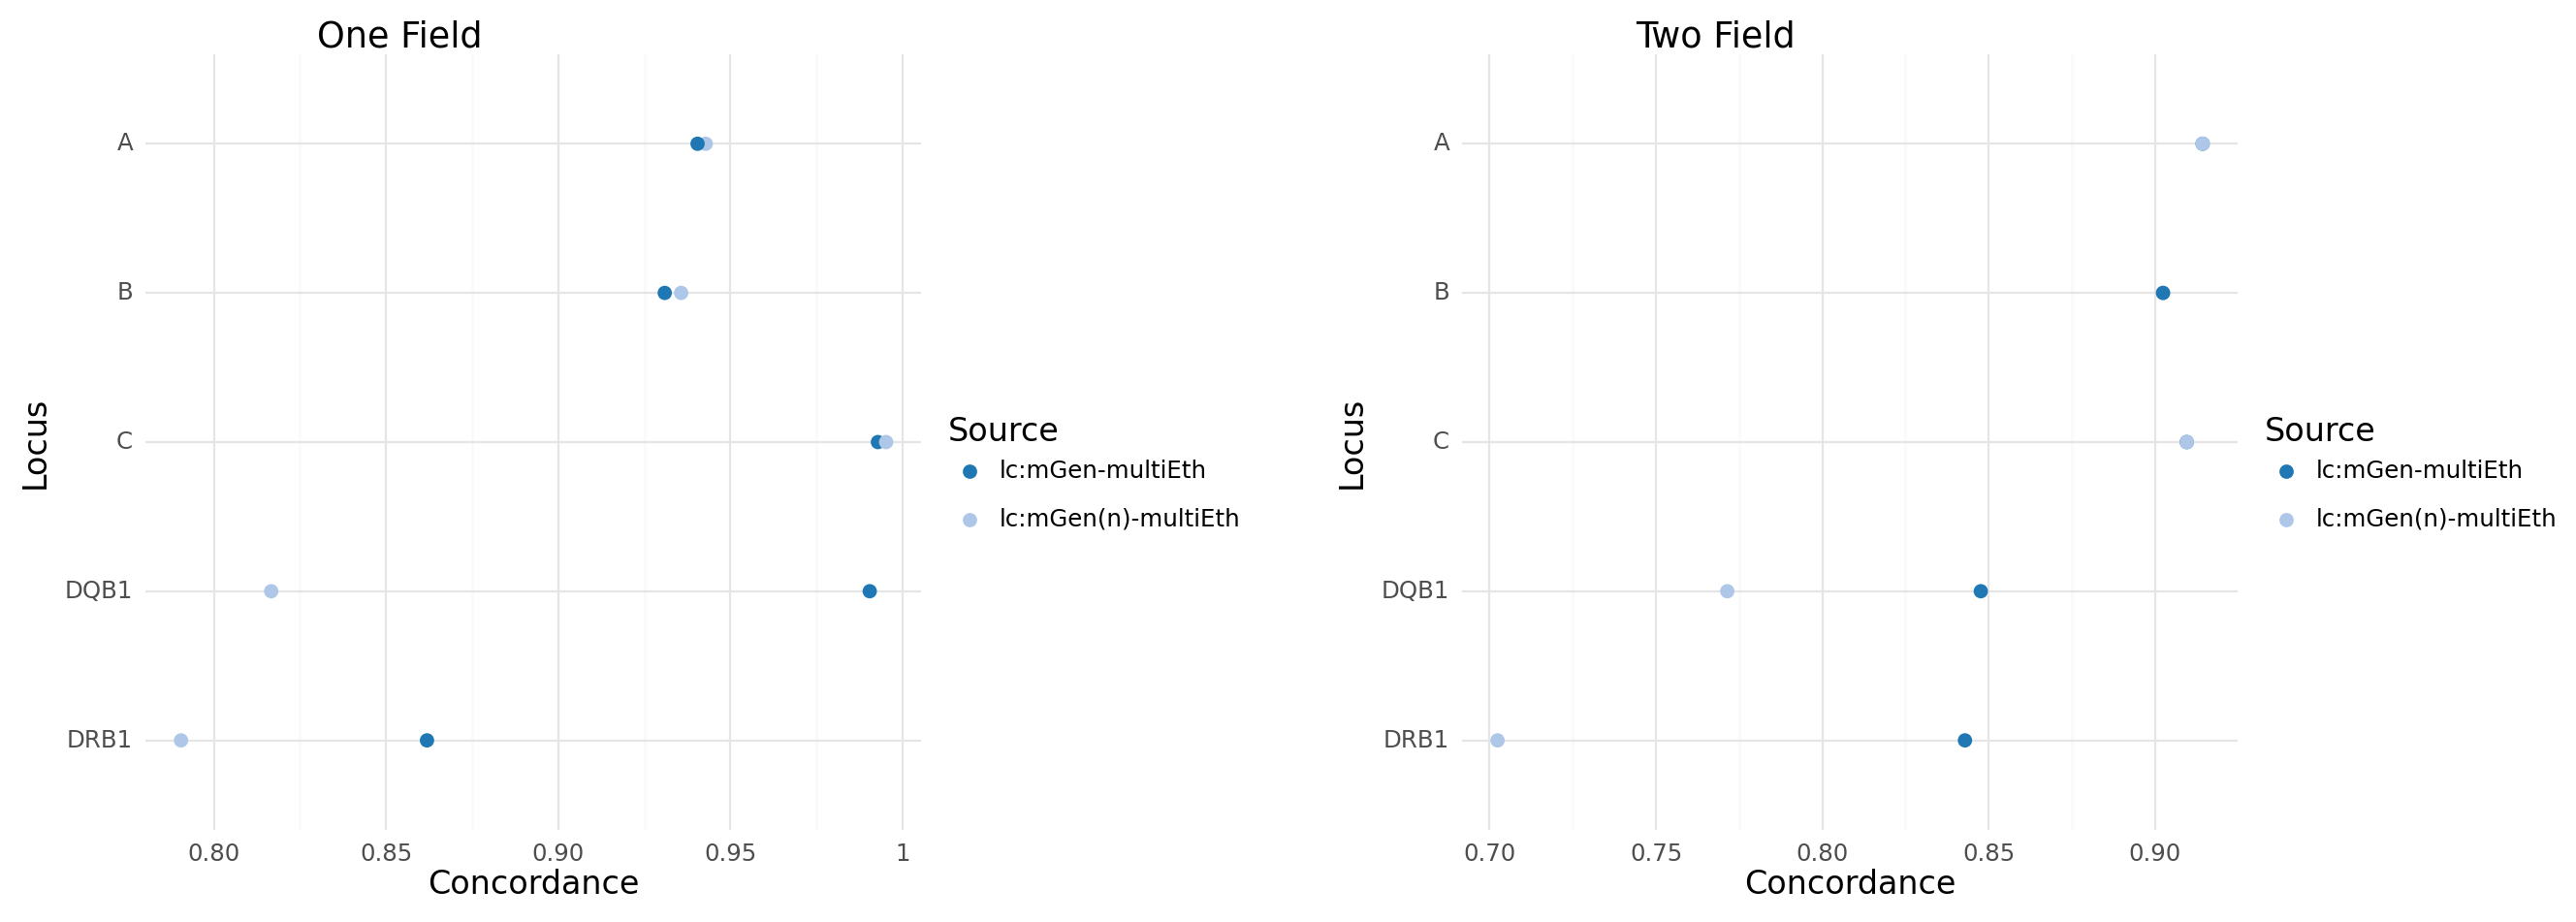

In [19]:
ix = [2, 3]

hla_dir = [hla_dirs[i] for i in ix]
label = [labels[i] for i in ix]

p = plot_hla_imputation_accuracy(hla_dir, label)
p

In [6]:
def compare_hla_types_by_type(typed, imputed):
    typed = typed.copy().sort_values(by = ['SampleID', 'Locus'])
    imputed = imputed.copy().sort_values(by = ['SampleID', 'Locus'])
    samples = imputed['SampleID'].unique()
    typed = typed[typed['SampleID'].isin(samples)].sort_values(by = ['SampleID', 'Locus'])
    
    res_dict = {}
    for l in HLA_GENES:
        typed_l = typed[typed['Locus'] == l].reset_index(drop = True)
        imputed_l = imputed[imputed['Locus'] == l].reset_index(drop = True)
        
        typed_types = list(pd.concat([typed_l['Two field1'], typed_l['Two field2']]).sort_values().unique())
        imputed_types = list(pd.concat([imputed_l['Two field1'], imputed_l['Two field2']]).sort_values().unique())
        
        res_dict[l] = pd.DataFrame(index=typed_types, columns=imputed_types).fillna(0)
        
        for ix in range(len(typed_l)):
            res_dict[l] = check_two_field_match_by_type(res_dict[l], typed_l, imputed_l, ix)  
    return res_dict
    
def check_two_field_match_by_type(df, typed_l, imputed_l, ix):
    t1 = typed_l.loc[ix, 'Two field1']
    t2 = typed_l.loc[ix, 'Two field2']
    i1 = imputed_l.loc[ix, 'Two field1']
    i2 = imputed_l.loc[ix, 'Two field2']
    
    typedallele1 = set(t1.split('/'))
    typedallele2 = set(t2.split('/'))
    imputedallele1 = set(i1.split('/'))
    imputedallele2 = set(i2.split('/'))

    c11, c22, c12, c21 = [1 if x >= 1 else 0 for x in [
        len(typedallele1.intersection(imputedallele1)),
        len(typedallele2.intersection(imputedallele2)),
        len(typedallele2.intersection(imputedallele1)),
        len(typedallele1.intersection(imputedallele2))
    ]]

    if c11 + c22 > c12 + c21:
        df.loc[t1, i1] += 1
        df.loc[t2, i2] += 1
    else:
        df.loc[t1, i2] += 1
        df.loc[t2, i1] += 1        
    return df

def calculate_hla_concordance_by_type(ccd_dict, verbose = False):
    res_dict = {}
    for l in HLA_GENES:
        df = ccd_dict[l]
        df['Accuracy'] = 0
        df['Sum'] = 0
        df['Match'] = 0
        for a in df.index:
            r = df.loc[a]
            
            index_set = set(a.split('/'))
            match = 0
            for column in df.columns:
                column_set = set(column.split('/'))
                if index_set & column_set:  # Check if there is an intersection
                    match += df.loc[a, column]

            total = r.sum()
            df.loc[a, 'Accuracy'] = match/total
            df.loc[a, 'Sum'] = total
            df.loc[a, 'Match'] = match
            
        if not verbose:
            res_dict[l] = df[['Accuracy', 'Sum', 'Match']]
        else:
            res_dict[l] = df
    return res_dict

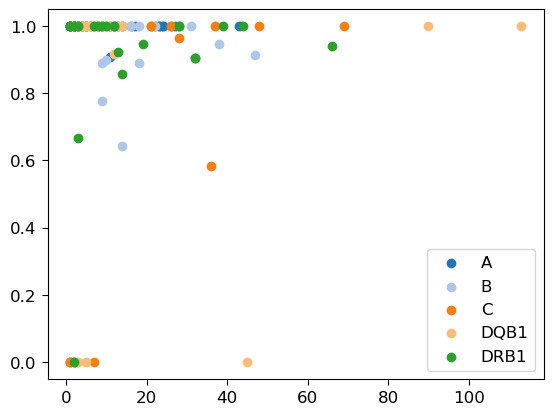

In [7]:
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')

# hla_dirs = ['/well/band/users/rbx225/GAMCC/results/hla/imputation/batches_archived/', 
#                   '/well/band/users/rbx225/GAMCC/results/hla/server/chip_vanilla/chr6.dose.vcf.gz',
#                   '/well/band/users/rbx225/GAMCC/results/hla/server/lc_oneKG/chr6.dose.vcf.gz',
#                   '/well/band/users/rbx225/GAMCC/results/hla/server/lc_oneKG_strict/chr6.dose.vcf.gz',
#                   '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv1/chr6.dose.vcf.gz',
#                   '/well/band/users/rbx225/GAMCC/results/hla/server/lc_mGenv3/chr6.dose.vcf.gz']
# labels =  ['QUILT', 'chip_multiEth', '1KG_multiEth', '1KG_strict_multiEth', 'mGenv1', 'mGenv3']

hla_dirs = ['/well/band/users/rbx225/GAMCC/results/hla/imputation/batches_archived/', 
                  '/well/band/users/rbx225/GAMCC/results/hla/server/chip_vanilla/chr6.dose.vcf.gz',
                  '/well/band/users/rbx225/GAMCC/results/hla/server/lc_oneKG/chr6.dose.vcf.gz']
labels =  ['lc:1KG (QUILT-HLA)', 'chip:multiEth', 'lc:1KG-multiEth']

chip = lcwgsus.read_hla_chip_imputation_results(hla_dirs[1], retain = 'fv')
hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
ccd_dict_chip = compare_hla_types_by_type(hla, chip)
ccd_dict_chip = calculate_hla_concordance_by_type(ccd_dict_chip, verbose = False)

for i, l in enumerate(HLA_GENES):
    df = ccd_dict_chip[l]
    plt.scatter(df['Sum'], df['Accuracy'], c = CATEGORY_CMAP_HEX[i], label = l)
plt.legend()

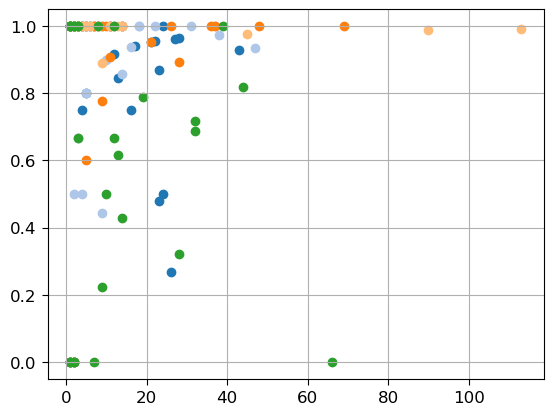

In [10]:
lc = lcwgsus.read_hla_lc_imputation_results(hla_dirs[0], retain = 'fv')

samples = chip['SampleID'].unique()
lc = lc[lc['SampleID'].isin(samples)].sort_values(by = ['SampleID', 'Locus'])

hla = lcwgsus.read_hla_direct_sequencing(retain = 'fv')
ccd_dict_lc = compare_hla_types_by_type(hla, lc)
ccd_dict_lc = calculate_hla_concordance_by_type(ccd_dict_lc, verbose = False)

for i, l in enumerate(HLA_GENES):
    df = ccd_dict_lc[l]
    plt.scatter(df['Sum'], df['Accuracy'], c = CATEGORY_CMAP_HEX[i], label = l)
# plt.legend()
ax = plt.gca()
ax.grid(True)

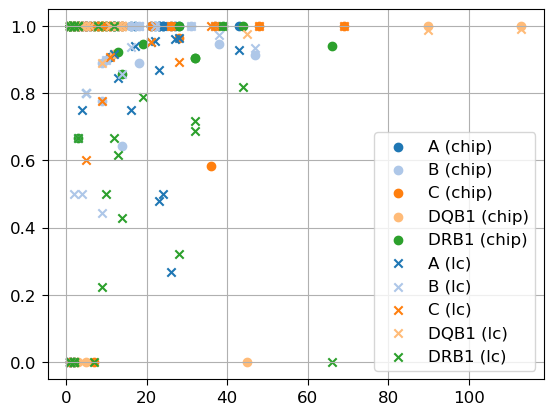

In [10]:
for i, l in enumerate(HLA_GENES):
    df = ccd_dict_chip[l]
    plt.scatter(df['Sum'], df['Accuracy'], c = CATEGORY_CMAP_HEX[i], label = f'{l} (chip)', marker = 'o')

for i, l in enumerate(HLA_GENES):
    df = ccd_dict_lc[l]
    plt.scatter(df['Sum'], df['Accuracy'], c = CATEGORY_CMAP_HEX[i], label = f'{l} (lc)', marker = 'x')

plt.legend()
plt.grid()

In [11]:
panel = pd.read_csv('/well/band/users/rbx225/GAMCC/results/hla/imputation/ref_panel/auxiliary_files/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep = '\t')
panel

,Region,Population,Sample ID,HLA-A 1,HLA-A 2,HLA-B 1,HLA-B 2,HLA-C 1,HLA-C 2,HLA-DQB1 1,HLA-DQB1 2,HLA-DRB1 1,HLA-DRB1 2
0,AFR,ACB,HG01879,23:01,68:02,13:02,42:01,08:04,17:01,02:02,04:02,03:02,09:01
1,AFR,ACB,HG01880,33:03,68:02,40:06,42:01,12:02,17:01,02:01,03:04,03:01,11:06
2,AFR,ACB,HG01882,23:01,34:02,07:02,44:50,04:01,07:02,06:02,06:02,15:03,15:03
3,AFR,ACB,HG01883,02:01,68:02,53:01,44:03,04:01,04:01,02:02,06:02,13:03,15:03
4,AFR,ACB,HG01885,03:01,33:03,35:01,35:01,04:01,07:18,02:02,03:19,13:04,07:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,SAS,STU,HG04114,02:01,24:02,52:01,55:01,01:02,12:02,03:02,06:03,13:01,04:03
2689,SAS,STU,HG04127,02:11,24:02,15:05,52:01,03:03,12:02,06:09,06:09,13:01,13:02
2690,SAS,STU,HG04210,02:01,24:02,15:25,35:01,04:01,07:26,05:02,06:03,13:01,14:02
2691,SAS,STU,HG04227,01:01,01:01,57:01,44:03,06:02,07:06,03:03,06:01,07:01,15:01


In [15]:
afr = panel[panel['Region'] == 'AFR']
gwd = afr[afr['Population'] == 'GWD']

In [28]:
df = panel
gene = 'HLA-DRB1'
hla_type = '13:04'

counts = pd.concat([df[gene + ' 1'], df[gene + ' 2']]).value_counts()
p = counts[hla_type]/counts.sum()
print(p)

0.008362757851700427


In [27]:
df = gwd
gene = 'HLA-DRB1'
hla_type = '13:04'

counts = pd.concat([df[gene + ' 1'], df[gene + ' 2']]).value_counts()
p = counts[hla_type]/counts.sum()
print(p)

0.15


In [26]:
df = afr
gene = 'HLA-DRB1'
hla_type = '13:04'

counts = pd.concat([df[gene + ' 1'], df[gene + ' 2']]).value_counts()
p = counts[hla_type]/counts.sum()
print(p)

0.03089887640449438


In [6]:
hla = lcwgsus.read_hla_direct_sequencing()
hla_alleles_df = lcwgsus.gather_hla_alleles(hla)
drb1 = hla_alleles_df[hla_alleles_df['Locus'] == 'DRB1']
drb1

,Locus,Allele
4,DRB1,DRB1*09:01/09:31
9,DRB1,DRB1*01:02
14,DRB1,DRB1*13:04
19,DRB1,DRB1*11:01
24,DRB1,DRB1*13:04
...,...,...
2479,DRB1,DRB1*09:01/09:31
2484,DRB1,DRB1*11:01
2489,DRB1,DRB1*03:02
2494,DRB1,DRB1*13:02


In [7]:
drb1['Allele'].str.split('*').str.get(1).unique()

array(['09:01/09:31', '01:02', '13:04', '11:01', '07:139/07:01',
       '09:21/09:01/09:31', '07:139/07:01/07:79/07:93', '03:02', '10:01',
       '13:03', '11:02', '08:06', '04:05', '03:01', '08:04', '13:01',
       '01:83/01:02/01:136', '13:02', '04:354/04:06', '01:136', '-9',
       '04:01', '04:03', '03:147/03:01/03:183/03:199', '16:02',
       '13:327/13:01/13:313', '15:185/15:178/15:03', '15:185/15:03',
       '14:243/14:54', '10:38Q/10:01', '12:10/12:01'], dtype=object)

In [24]:
counts[hla_type]

44